In [1]:
import numpy as np

# initialize variables
n = 1000 # number of nodes
p = 0.5 # constant parameter

# k = math.ceil(p * math.log2(n)) # calculate number of attributes
k = 5
# values inside affinity matrix
alpha = 0.98
beta = 0.58
gamma = 0.05

# affinity matrix for all i
aff = np.array([[alpha,beta],[beta, gamma]])

# Probability of answer being yes/true = 0
mu = 0.45

# Attribute Matrix. k-rows and n columns. 
V = np.random.binomial(1,mu,size=(k,n))
P_u_v = np.empty((len(V.T),len(V.T)))
prob_u_v = np.empty((len(V),1))
u = np.empty((len(V),1))
v = np.empty((len(V),1))

# create probability for connection between u and v
for i in range(len(V.T)):
    u = V[:,i]

    for k in range(len(V.T)):
        v = V[:,k]

        for j in range(len(V)):
            prob_u_v[j] = aff[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v) 



np.fill_diagonal(P_u_v,0)
np.triu(P_u_v)



' u_f = V[:,-1]\nv_f = V[:,0]\nprob_u_v_f = np.empty((len(V),1))\n\nfor j in range(len(V)):\n    prob_u_v_f[j] = aff[u_f[j],v_f[j]]\nP_u_v[len(V.T)-1] = np.prod(prob_u_v_f)\n\nDiag_mat = np.diagflat(P_u_v) '

In [2]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0



In [3]:
A = A + A.T - np.diag(np.diag(A))
np.sum(A) / 2

3703081.0

In [4]:
import networkx as nx
import matplotlib.pyplot as plt 
G = nx.from_numpy_matrix(A)
# pos = nx.kamada_kawai_layout(G)


Error: Pip module Unable to parse debugpy output, please log an issue with https://github.com/microsoft/vscode-jupyter is required for debugging cells. You will need to install it to debug cells.

In [ ]:
nx.write_edgelist(G, "test.edgelist.txt")

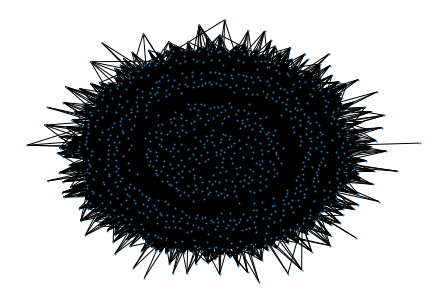

In [48]:
nx.draw(G,pos,node_size=1)
plt.show()